<a href="https://colab.research.google.com/github/Redzoro1993/ARIMA-COURSE-DATA-/blob/master/Punto1RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from math import *
import seaborn as sns

Información de la curva cero cupón de mercado en tiempo continuo asociada a la tasa R

In [70]:
from google.colab import files
files.upload()

Saving curva_punto1.txt to curva_punto1 (3).txt


{'curva_punto1.txt': b'Days\tRate\r\n30\t0.01367\r\n60\t0.0146\r\n90\t0.0155\r\n120\t0.01578\r\n150\t0.016\r\n180\t0.0164\r\n210\t0.0172\r\n240\t0.1988\r\n270\t0.021507\r\n300\t0.022228\r\n330\t0.0256\r\n360\t0.029516\r\n390\t0.031\r\n420\t0.035656\r\n450\t0.037506\r\n480\t0.03899\r\n510\t0.04298\r\n540\t0.045516\r\n570\t0.0465\r\n600\t0.04801\r\n630\t0.05079\r\n660\t0.05203\r\n690\t0.0557\r\n720\t0.057\r\n750\t0.05771\r\n780\t0.05807\r\n810\t0.058882\r\n840\t0.059517\r\n870\t0.059553\r\n900\t0.060063\r\n930\t0.060775\r\n960\t0.061419\r\n990\t0.061973\r\n1020\t0.062475\r\n1050\t0.063317\r\n1080\t0.063858'}

In [50]:
mkt_rates = pd.read_csv("curva_punto1.txt", sep = "\t")
mkt_rates["Time"] = mkt_rates["Days"].astype(float) / 360
P_mkt = pd.concat([mkt_rates['Time'], np.exp(-mkt_rates.Rate * mkt_rates.Time)],axis = 1)
mkt_rates["Time"] = mkt_rates["Time"].round(2)
P_mkt["Time"] = mkt_rates["Time"].round(2)
P_mkt.columns = ["Time", "DF"]

In [ ]:
mkt_rates

In [52]:
P_mkt = pd.concat([mkt_rates["Time"],np.exp(-mkt_rates.Rate * mkt_rates.Time)],axis = 1)
P_mkt.columns = ["Time", "DF"]

In [53]:
sigma = 0.15
k = 0.01
delta_t = 0.25
time_periods = 9
delta_X = sigma * np.sqrt(3 * delta_t) 

Setup inicial

Arbol X

In [54]:
j_periods = time_periods * 2 - 1
j_max = math.ceil(0.184/(k*delta_t))
X0 = 0

In [55]:
X_tree = pd.DataFrame(np.nan, index = range(0,j_periods), columns = range(0, time_periods))

In [56]:
for i in range(0, time_periods):
    index_X_tree = X_tree.loc[(time_periods-i-1):(time_periods+i-1),i].index 
    X_tree.loc[(time_periods-i-1):(time_periods+i-1),i] = X0 + delta_X  * (pd.DataFrame(pd.Series(range(i,-i-1,-1))).set_index(index_X_tree))[0]   

In [58]:
def branch_a(k, delta_t, j):
    p_u = 1/6 + 1/2*(k**2 * j**2 * delta_t**2 - k * j * delta_t)
    p_m = 2/3 - k**2 * j**2 * delta_t**2
    p_d = 1/6 + 1/2*(k**2 * j**2 * delta_t**2 + k * j * delta_t)
    data = [p_u, p_m, p_d]
    probability = pd.DataFrame(data, index = ['p_u', 'p_m', 'p_d'])
    return(probability)

def branch_b(k, delta_t, j):
    p_u = 1/6 + 1/2*(k**2 * j**2 * delta_t**2 + k * j * delta_t)
    p_m = -1/3 - k**2 * j**2 * delta_t**2 - 2 * k * j * delta_t
    p_d = 7/6 + 1/2 * (k**2 * j**2 * delta_t**2 + 3 * k * j * delta_t)
    data = [p_u, p_m, p_d]
    probability = pd.DataFrame(data, index = ['p_u', 'p_m', 'p_d'])
    return(probability)
    
def branch_c (k, delta_t, j):
    p_u = 7/6 + 1/2 * (k**2 * j**2 * delta_t**2 - 3 * k * j * delta_t)
    p_m = -1/3 - k**2 * j**2 * delta_t**2 + 2 * k * j * delta_t
    p_d = 1/6 + 1/2 * (k**2 * j**2 * delta_t**2 - k * j * delta_t)
    data = [p_u, p_m, p_d]
    probability = pd.DataFrame(data, index = ['p_u', 'p_m', 'p_d'])
    return(probability)
    
def prob(k, delta_t, j, j_max):
    if j < j_max and j > - j_max :
        probability = branch_a(k, delta_t, j)
    elif j == -j_max:
        probability = branch_b(k, delta_t, j)
    else:
        probability = branch_c(k, delta_t, j)
    return(probability)

In [59]:
j = X_tree/delta_X 
Q = pd.DataFrame(np.nan, index = range(0,j_periods), columns = range(0, time_periods))
Q.loc[time_periods - 1,0] = 1
alpha = pd.Series([]) 
alpha[0] = float(mkt_rates['Rate'][np.where(mkt_rates['Time'] == (delta_t * (0 + 1)))[0]])
DF = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [60]:
for i in range(1,time_periods):
    for h in range(0, len(j.index)):
        if np.isnan(j.loc[h,i]): 
            continue
        else:
            DF[i] = float(P_mkt['DF'][np.where(P_mkt['Time'] == (delta_t * (i + 1)))[0]])
            if i == time_periods - 1 and h == len(j.index) - 1:
                Q_1 = Q.loc[h-1,i-1] * prob(k,delta_t,j.loc[h-1,i-1],j_max).loc["p_d",0] * np.exp((-(alpha[i-1] + j.loc[h-1,i-1] * delta_X))*delta_t)
                Q_2 = 0
                Q_3 = 0
            elif i == time_periods - 1 and h == 0:
                Q_1 = 0
                Q_2 = 0
                Q_3 = Q.loc[h+1,i-1] * prob(k,delta_t,j.loc[h+1,i-1],j_max).loc["p_u",0] * np.exp((-(alpha[i-1] + j.loc[h+1,i-1] * delta_X))*delta_t)
            else:
                Q_1 = Q.loc[h-1,i-1] * prob(k,delta_t,j.loc[h-1,i-1],j_max).loc["p_d",0] * np.exp((-(alpha[i-1] + j.loc[h-1,i-1] * delta_X))*delta_t)
                Q_2 = Q.loc[h,i-1] * prob(k,delta_t,j.loc[h,i-1],j_max).loc["p_m",0] * np.exp((-(alpha[i-1] + j.loc[h,i-1] * delta_X))*delta_t)
                Q_3 = Q.loc[h+1,i-1] * prob(k,delta_t,j.loc[h+1,i-1],j_max).loc["p_u",0] * np.exp((-(alpha[i-1] + j.loc[h+1,i-1] * delta_X))*delta_t)
            Q.loc[h,i] = np.nansum([Q_1, Q_2, Q_3])
        alpha[i] = (np.log(np.nansum(Q.loc[:,i] * np.exp(-X_tree.loc[:,i] * delta_t))) - np.log(DF[i]))/delta_t   

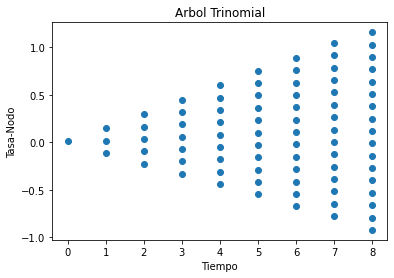

In [61]:
R_tree = pd.DataFrame(np.nan, index = range(0,j_periods), columns = range(0, time_periods))
for i in range(0, time_periods):
    R_tree.loc[(time_periods-i-1):(time_periods+i-1),i] = alpha[i]+X_tree.loc[(time_periods-i-1):(time_periods+i-1),i]
    
R_results = pd.DataFrame({'RATE':[], 'TIME':[]})
for i in range(0, time_periods):
    time = pd.Series([i] *  len(R_tree.loc[:,i]))
    R_result = pd.concat([R_tree.loc[:,i],time], axis =1)
    R_result.columns = ["RATE", "TIME"]
    R_results = pd.concat([R_results,R_result])

R_results = R_results.dropna()
R_results = R_results.reset_index(drop = True)

plt.scatter(x = R_results['TIME'], y = R_results['RATE'])
plt.xlabel('Tiempo')
plt.ylabel('Tasa-Nodo')
plt.title('Arbol Trinomial')
plt.show()

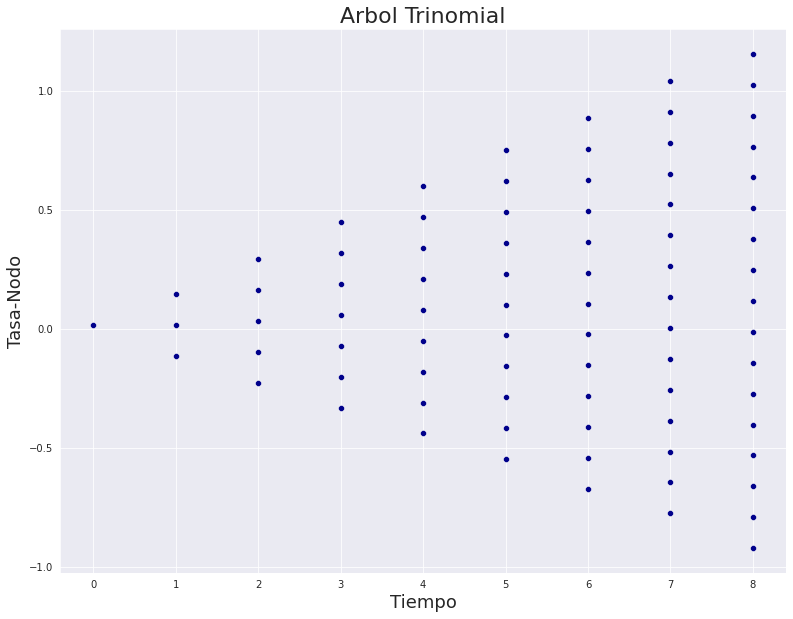

In [100]:
sns.set_style("darkgrid")
plt.figure(figsize=(13, 10))
plt.xlabel('Tiempo',fontsize = 18)
plt.ylabel('Tasa-Nodo',fontsize = 18)
plt.title('Arbol Trinomial',fontsize = 22)
sns.scatterplot(x = R_results['TIME'], y = R_results['RATE'], color = "DarkBlue" ,alpha = 1 ,palette="deep")

In [64]:
def Capplet_Val_ite(DataFrame,Strike = 0.03):
    Row_num = DataFrame.shape[0]-1
    Col_num = DataFrame.shape[1]-1
    Desc_mat = np.zeros(shape=(Row_num-1,Col_num))
    
    for j in range(Col_num,0,-1):
                      
        for i in range(1,Row_num):
            Tasa_Nodo = DataFrame.iloc[i,j-1]
            Desc_mat[i-1,j-1] = 0.5*(np.exp(-0.5*Tasa_Nodo)*(max(DataFrame.iloc[i-1,j]-Strike,0)*0.5+max(DataFrame.iloc[i,j]-Strike,0)*0.25+max(DataFrame.iloc[i+1,j]-Strike,0)*0.25)+max(Tasa_Nodo-Strike,0))
    return Desc_mat

Arbol_Caplet = Capplet_Val_ite(R_tree)

In [65]:
Sol = pd.DataFrame(Arbol_Caplet)

In [66]:
Nocional = 2000

In [67]:
Valoración_Caplet = (solR[0].dropna())* Nocional 

In [68]:
Valoración_Caplet

7    58.498344
Name: 0, dtype: float64